In [9]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import requests

link = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# prepare for the data
with open('titanic.csv', 'wb') as f:
    f.write(requests.get(link).content)
content = pd.read_csv('titanic.csv', sep=',')
content = content.dropna()

age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']


In [10]:
# build the model-function and loss
def func(age, k, b):
    return k * age + b

def loss(y, yhat):
    return np.mean(np.power(y - yhat, 2)) / 2


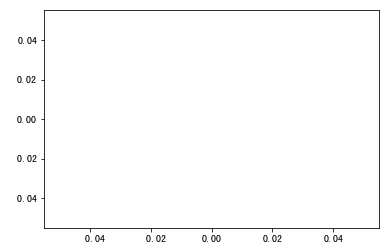

In [11]:
# Random pick k, b
i = 0
# initialization
k_hat, b_hat = 0, 0
optim_loss = loss(sub_fare, func(sub_age, k_hat, b_hat))
original_loss = optim_loss

history = []

while i < 10000:
    new_k = np.random.uniform(-2, 2)
    new_b = np.random.uniform(0, 200)

    y_hat = func(sub_age, k_hat, b_hat)
    curr_loss = loss(sub_fare, y_hat)

    if curr_loss < optim_loss:
        history.append(curr_loss)
        optim_loss = curr_loss
        k_hat, b_hat = new_k, new_b

    i += 1
plt.plot(history)


**Note**: No better result detected after 10000 iterations.

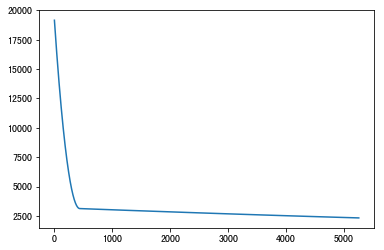

In [12]:
# Supervise the directions
directions = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
i = 0
j = 0

# initialization
k_hat = 0
b_hat = 0
lr = 0.01
history = []
optim_loss = loss(sub_fare, func(sub_age, k_hat, b_hat))
original_loss = optim_loss
optim_direction = directions[j]
while i < 10000:
    new_k = k_hat + optim_direction[0] * lr
    new_b = b_hat + optim_direction[1] * lr

    curr_loss = loss(sub_fare, func(sub_age, new_k, new_b))
    if curr_loss < optim_loss:
        history.append(curr_loss)
        optim_loss = curr_loss
        k_hat, b_hat = new_k, new_b
    else:
        j += 1
        optim_direction = directions[j % 4] # update directions recursively
    i += 1

plt.plot(history)


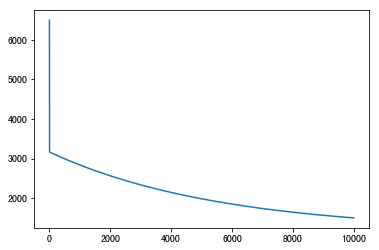

In [14]:
# gradient descent method
def dk(y, yhat, x):
    tmp = (y - yhat) * x
    return -np.mean(tmp)

def db(y, yhat, x):
    tmp = (y - yhat)
    return -np.mean(tmp)

# initialization
i = 0
k_hat = 1
b_hat = 2
lr = 0.001
history = []
optim_loss = loss(sub_fare, func(sub_age, k_hat, b_hat))
while i < 10000:
    # gradient descent
    k_hat = k_hat - lr * dk(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_hat = b_hat - lr * db(sub_fare, func(sub_age, k_hat, b_hat), sub_age)

    curr_loss = loss(sub_fare, func(sub_age, k_hat, b_hat))
    history.append(curr_loss)
    i += 1
plt.plot(history)
